## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import gensim
from gensim.models import CoherenceModel, LdaMulticore

!pip install pyldavis
import pyLDAvis
pyLDAvis.enable_notebook()

!pip install emoji
import emoji


[nltk_data] Downloading package wordnet to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 29.5 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


## **Read CSV File**

In [5]:
## read the review file
df = pd.read_csv("reviews.csv")
print(df.head())

        Time_submitted  \
0  2022-07-09 15:00:00   
1  2022-07-09 14:21:22   
2  2022-07-09 13:27:32   
3  2022-07-09 13:26:45   
4  2022-07-09 13:20:49   

                                                                                                             Review  \
0  Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.   
1                            Please ignore previous negative rating. This app is super great. I give it five stars+   
2        This pop-up "Get the best Spotify experience on Android 12" is too annoying. Please let's get rid of this.   
3                                                                   Really buggy and terrible to use as of recently   
4              Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?   

   Rating  Total_thumbsup Reply  
0       5               2   NaN  
1       5               1   NaN  
2       4               0 

## **Data Exploration and Data Preprocessing**

In [6]:
data = df[["Review", "Rating"]]
data.head()

,Review,Rating
0,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.",5
1,Please ignore previous negative rating. This app is super great. I give it five stars+,5
2,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,1


In [7]:
data.shape

(61594, 2)

In [8]:
# Short Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61594 non-null  object
 1   Rating  61594 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 962.5+ KB


In [9]:
# Dropping duplicate Reviews
data = data.drop_duplicates(subset='Review')
data.shape

(61356, 2)

**Presence of Duplicate Reviews**

<Axes: xlabel='Rating', ylabel='count'>

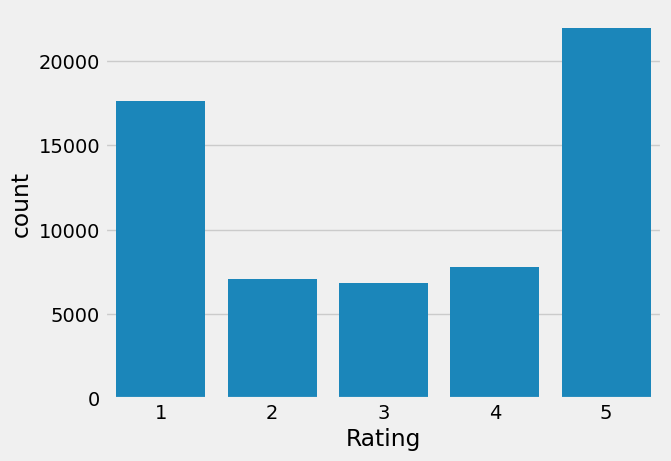

In [10]:
# Create countplot with value counts
sns.countplot(data, x='Rating')

In [11]:
## Testing purpose | exploring the data
filtered_data = data[data['Review'].str.contains('@|#|https?://', na=False)]
print(filtered_data.shape)
filtered_data.head(10)

(174, 2)


,Review,Rating
88,I hate this If i have spotify free i can only listen to the half of the song on mobile hate this f#$× u,1
520,"Need a mental piece of mind but this app would let me. The ads are pretty annoying, talks about Spotify premium all the time like I would purchase. If I did then it will be over my dead body. Deleting the app. Sayonara #crapapp",1
1264,"#JRE is truly the only reason I use Spotify. Pretty good, you can find and listen to almost anything. Ads stink, especially the ads from Spotify trying to get me to pay for premium so I don't have to listen to ads.",4
1362,This is amazing. I really like it💜💜 #spotify💜💜,5
1590,"Spotify is great except two things. #1, It would be so much funner if it notified you when people followed you or notifed others when you follow them, I'm following countless friends who have no idea. It could be so much better. And #2, if you don't pay you lose access to listening to your Playlists, YouTube music still let's you listen to your Playlists when you don't pay, the only difference is having ads or not having ads. I hate that Spotify cuts you off.",4
1637,It's a good app but there are few things bad with it it has a 6 hour wait to it when u skip like 4. Or 3 songs #2 it skips randomly for no reason #3 u can pick ur own song u just have to hope it's the first one Here is a good thing u can actually change the song without it being random in daily mixes,3
1715,"After using over five(5) music 🎵 apps , this is one of many I give a five(5)+🌟🌟🌟🌟🌟🔥 In which I enjoy sharing With family and friends. Also , you can creat your Own playlist 🎧🎶🎵🎧 And share .... 🔝#1🎭✨✨👍",5
1739,"Many problems with this app. #1 You can’t even play the songs you want. Every time I shuffle play liked songs or my own playlists it just plays songs that aren’t even there. #2 Too much ads. #3 Whenever I search for a song, I have to go through every single playlist that appeared till I find the one I want, sometimes I don’t even find it. #4 You have 6 skips every hour but can’t even play what you want so I just skip to the song I want but then my skips are just wasted. You need to fix this.",1
1969,#1 music 🎸and podcast🎙️ application 💥 for when you get the need 👙 for some time out.💡,5
2064,Love it #1 in my book. Been a customer for over 4 years,5


**with this exploration, presence of @username , #hastags , urls and also emojis was found**

In [12]:
# Remove URL, mentions and hashtags
def remove_url_mentions_hashtag(text):
    text = re.sub(r'https?://\S+|www\.\S+','',text)
    text = re.sub(r'@\S*','',text)
    text = re.sub(r'#\S*','',text)
    text = emoji.demojize(text)
    text = text.replace(':', ' ').replace('_', ' ')
    text = text.replace('  ', ' ')
    return text

data.Review = data.Review.apply(remove_url_mentions_hashtag)

In [13]:
## Just for testing purpose
filtered_data = data[data['Review'].str.contains('After using over', na=False)]
filtered_data

,Review,Rating
1715,"After using over five(5) music musical note apps , this is one of many I give a five(5)+ glowing star glowing star glowing star glowing star glowing star fire In which I enjoy sharing With family and friends. Also , you can creat your Own playlist headphone musical notes musical note headphone And share .... TOP arrow",5


In [14]:
# Defining Contractions
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
}

In [15]:
# Expand contractions
## this will help in better tokenization i.e., Full forms ensure consistent word boundaries.
## and
## Clearer context:  Full forms improve model understanding of meaning.
def remove_contractions(text):
    text = text.lower()

    text = text.split()
    new_text = []

    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)

    text = " ".join(new_text)

    return text

data.Review = data.Review.apply(remove_contractions)

<ipython-input-16-a11195be0066>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='words', y='count', data= _, palette='summer')


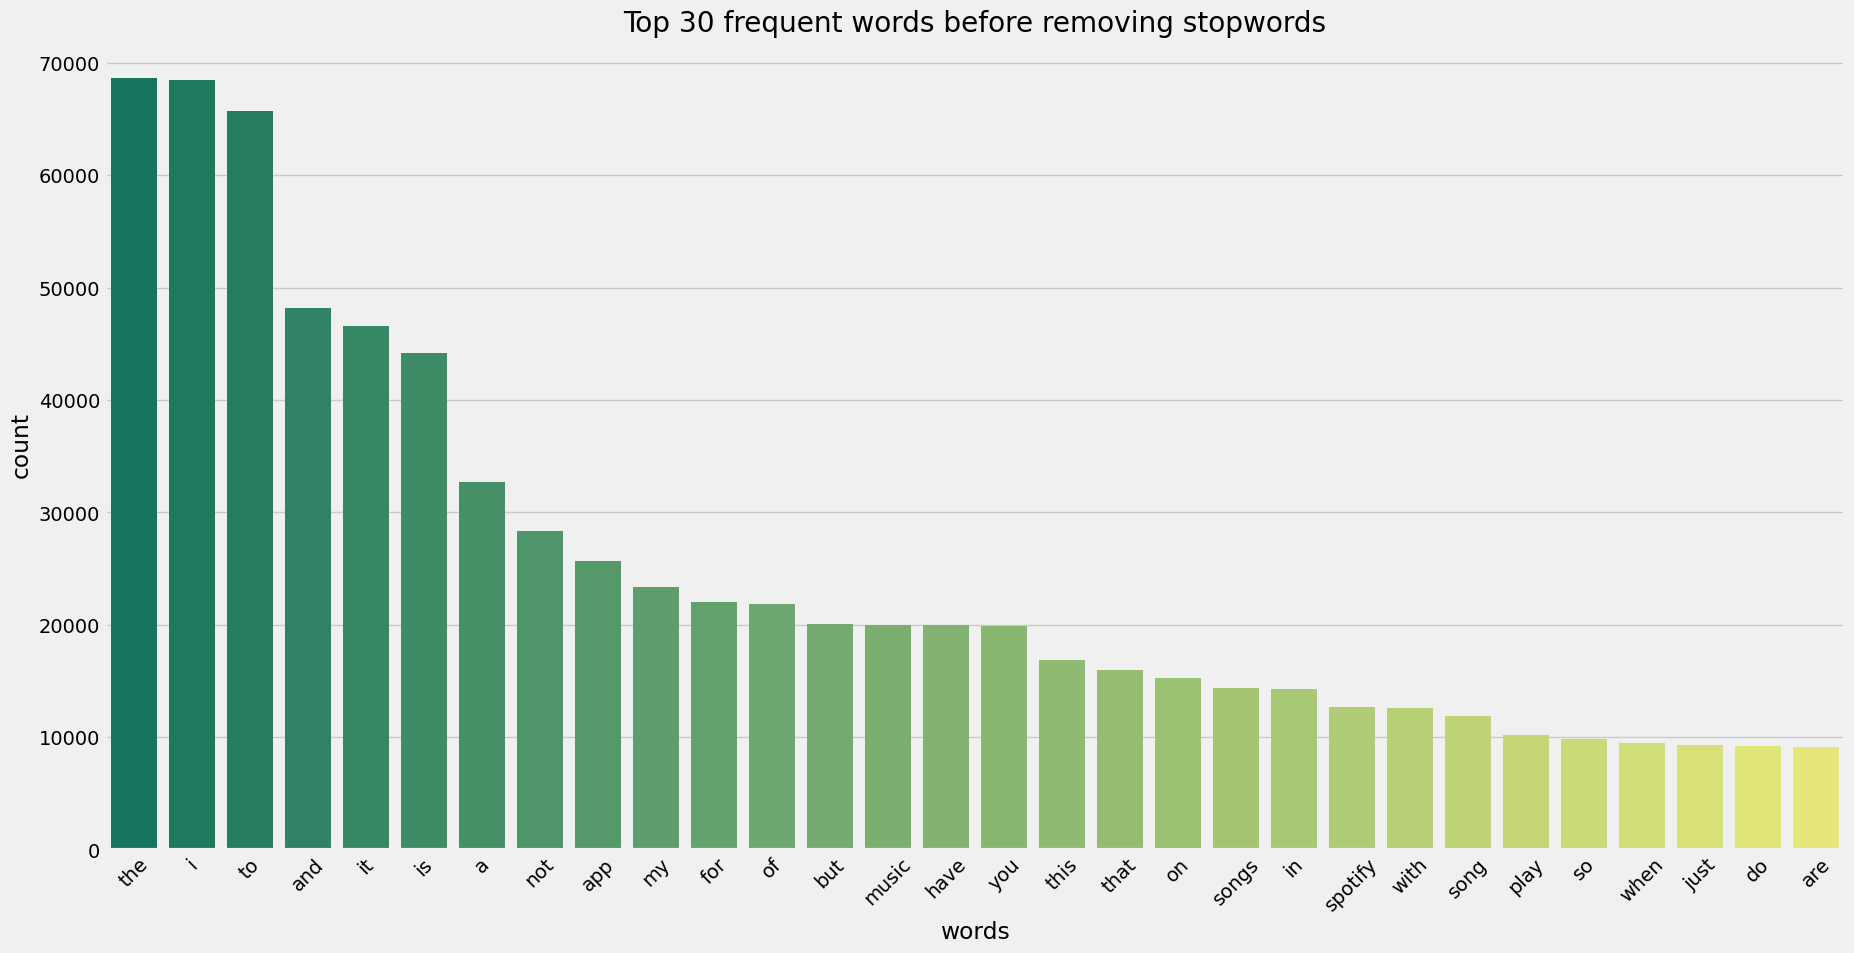

In [16]:
# Join all words
review_words = ','.join(list(data['Review'].values))

# Count and find the top 30 frequent
counter = Counter(review_words.split())
most_frequent = counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20,10))
_ = pd.DataFrame(most_frequent, columns=('words', 'count'))
sns.barplot(x='words', y='count', data= _, palette='summer')
plt.xticks(rotation=45)
plt.title("Top 30 frequent words before removing stopwords");

In [17]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
## looking at the above plot, we can make a customization to our stopwords list
stopwords_list.extend(["spotify", "app", "song","music", "songs", "play"])

def lemmatization(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text, deacc=True):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in stopwords_list:
            result.append(lemmatization(token))

    return result

data["Review_Clean_List"] = data.Review.apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
# Convert list to string
def to_string(text):
    text = ' '.join(map(str, text))
    return text

data['Review_Clean'] = list(map(to_string, data['Review_Clean_List']))

In [19]:
data.head()

,Review,Rating,Review_Clean_List,Review_Clean
0,"great music service, the audio is high quality and the app is easy to use. also very quick and friendly support.",5,"[great, service, audio, high, quality, easy, use, quick, friendly, support]",great service audio high quality easy use quick friendly support
1,please ignore previous negative rating. this app is super great. i give it five stars+,5,"[ignore, previous, negative, rat, super, great, star]",ignore previous negative rat super great star
2,"this pop-up ""get the best spotify experience on android 12"" is too annoying. please let us get rid of this.",4,"[pop, best, experience, android, annoy, let, rid]",pop best experience android annoy let rid
3,really buggy and terrible to use as of recently,1,"[buggy, terrible, use, recently]",buggy terrible use recently
4,dear spotify why do i get songs that i did not put on my playlist??? and why do we have shuffle play?,1,"[dear, playlist, shuffle]",dear playlist shuffle


In [20]:
data[data["Review_Clean_List"].str.len() == 0]

,Review,Rating,Review_Clean_List,Review_Clean
1212,100% has everything!,5,[],
3691,in this app all songs are there,3,[],
8940,there are others out there but i always go back to spotify.,5,[],
9242,spotify and only spotify for me!,5,[],
12511,spotify will not play again.,4,[],
14145,every songs is there !!,5,[],
17781,it does not have all the songs,1,[],
18584,could not ever be without my spotify.,5,[],
19268,sometimes my music just will not play!!,4,[],
19710,cant even play a full song,1,[],


In [21]:
### New dataset to work with
data = data[data["Review_Clean_List"].str.len() != 0]

In [46]:
data.shape

(61339, 4)

<ipython-input-22-bb796f8cfadb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='words', y='count', data= _, palette='summer')


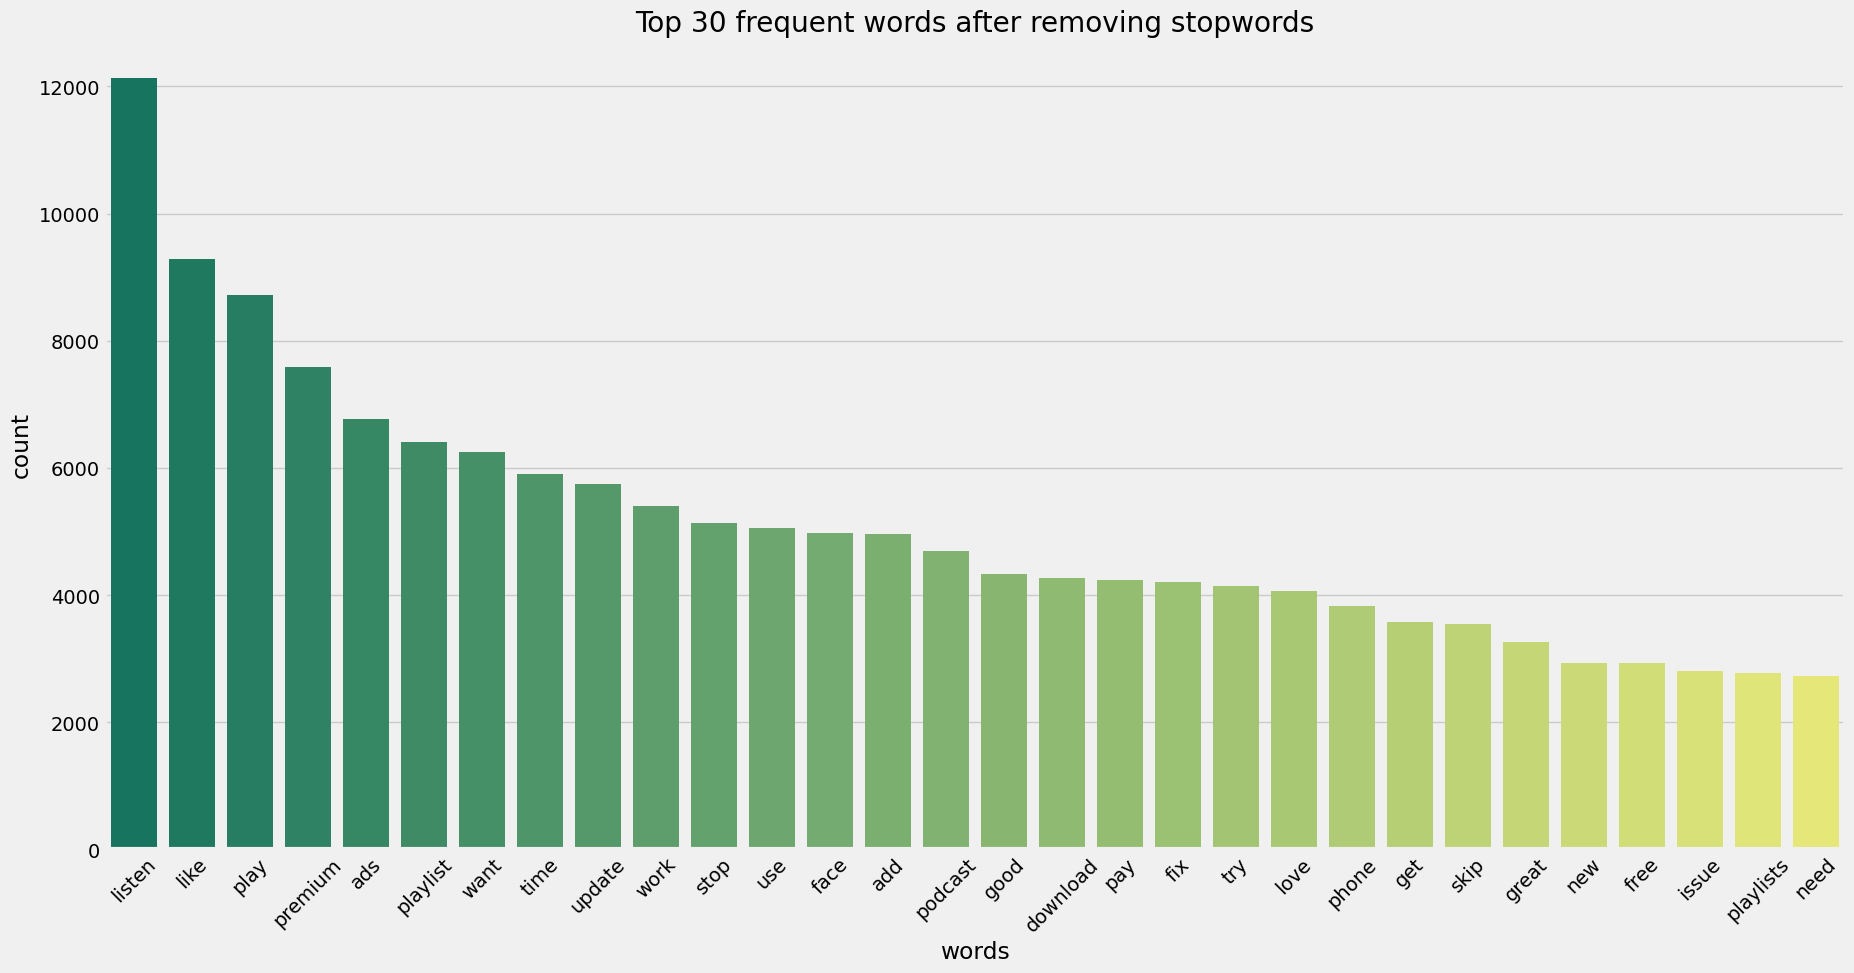

In [22]:
# Join all words
review_words = ','.join(list(data['Review_Clean'].values))

# Count and find the 30 most frequent
counter = Counter(review_words.split())
most_frequent = counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20,10))
_ = pd.DataFrame(most_frequent, columns=('words', 'count'))
sns.barplot(x='words', y='count', data= _, palette='summer')
plt.xticks(rotation=45)
plt.title("Top 30 frequent words after removing stopwords");

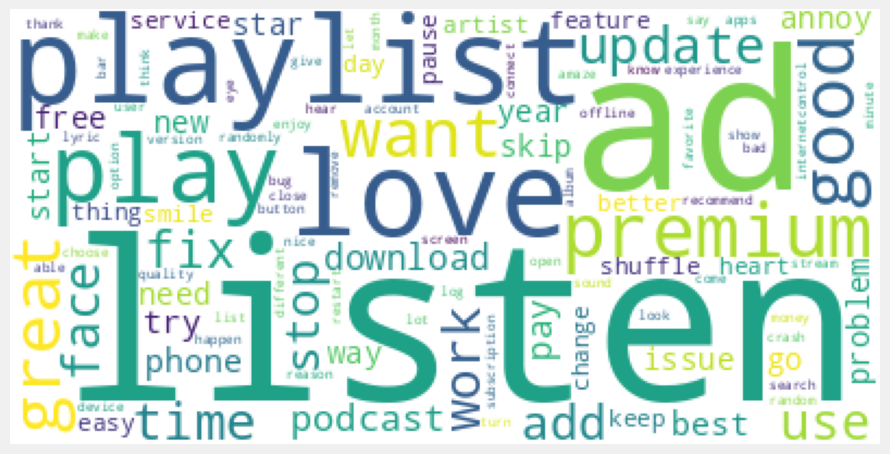

In [23]:
# Generate the word cloud
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      contour_width=8,
                      contour_color='steelblue',
                      collocations=False).generate(review_words)

# Visualize the word cloud
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [24]:
data.head(2)

,Review,Rating,Review_Clean_List,Review_Clean
0,"great music service, the audio is high quality and the app is easy to use. also very quick and friendly support.",5,"[great, service, audio, high, quality, easy, use, quick, friendly, support]",great service audio high quality easy use quick friendly support
1,please ignore previous negative rating. this app is super great. i give it five stars+,5,"[ignore, previous, negative, rat, super, great, star]",ignore previous negative rat super great star


In [25]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data["Review_Clean_List"])

# Create Corpus: Term Document Frequency for each review
corpus = [id2word.doc2bow(text) for text in data["Review_Clean_List"]]


## **Identifying the optimal number of topics**



1.   Determining the appropriate number of topics for topic modeling can be **challenging**
2.   Choosing **too many topic**s may cause the model to miss broader themes within the data.

1.   On the other hand, selecting **too few topics** can lead to significant overlap between words in different topics.
2.   The topic **coherence score** helps address this issue effectively.







In [26]:
# Compute coherence score
no_of_topics = []
coherence_score = []

for i in range(2,11):
    lda_model = LdaMulticore(corpus=corpus,
                            id2word=id2word,
                            iterations=50,
                            num_topics=i,
                            passes=10,
                            workers=2)

    # Instantiate topic coherence model
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data["Review_Clean_List"], dictionary=id2word, coherence='c_v')

    # Get topic coherence score
    coherence_lda = coherence_model_lda.get_coherence()
    no_of_topics.append(i)
    coherence_score.append(coherence_lda)

In [41]:
# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':no_of_topics,
                               'coherence_score':coherence_score})

In [44]:
#Print the df
topic_coherence

,number_of_topics,coherence_score
0,2,0.452611
1,3,0.439841
2,4,0.503662
3,5,0.551313
4,6,0.515924
5,7,0.583250
6,8,0.570922
7,9,0.581525
8,10,0.543024


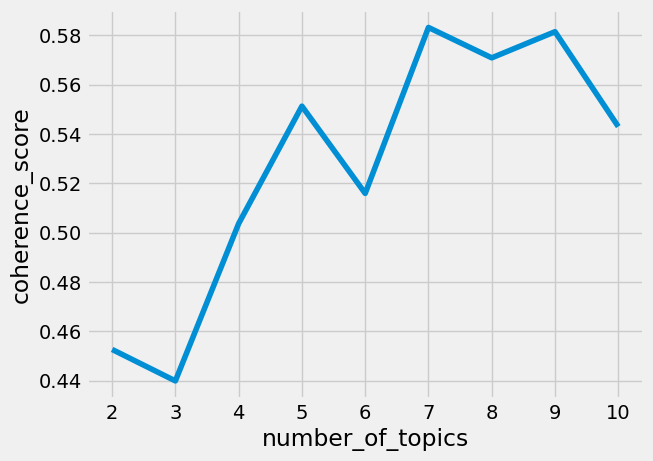

In [45]:
# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score');

A **high coherence score of 0.583250** was achieved with **seven** topics, so the LDA model will be built using **seven** topics.

## **Topic Modelling using LDA (Latent Dirichlet Allocation)**

In [32]:
## For No of Topic = 7
lda_model_7 = LdaMulticore(corpus, num_topics=7, id2word=id2word, passes=8, workers=3)

In [33]:
# Print words occuring in each of the topics
for idx, topic in lda_model_7.print_topics(-1):
    print('\nTopic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.058*"playlist" + 0.046*"add" + 0.043*"want" + 0.043*"listen" + 0.033*"like" + 0.022*"play" + 0.022*"shuffle" + 0.021*"skip" + 0.012*"good" + 0.012*"random"

Topic: 1 
Words: 0.037*"try" + 0.034*"log" + 0.033*"work" + 0.028*"account" + 0.024*"lyric" + 0.021*"internet" + 0.019*"say" + 0.018*"fix" + 0.017*"connection" + 0.016*"problem"

Topic: 2 
Words: 0.092*"ads" + 0.044*"premium" + 0.036*"free" + 0.031*"listen" + 0.030*"good" + 0.022*"ad" + 0.018*"like" + 0.014*"pay" + 0.011*"minutes" + 0.010*"get"

Topic: 3 
Words: 0.047*"love" + 0.043*"best" + 0.040*"face" + 0.027*"great" + 0.023*"smile" + 0.021*"good" + 0.021*"easy" + 0.020*"listen" + 0.020*"use" + 0.020*"heart"

Topic: 4 
Words: 0.044*"like" + 0.030*"listen" + 0.024*"love" + 0.023*"great" + 0.022*"podcast" + 0.017*"playlists" + 0.016*"new" + 0.013*"artists" + 0.010*"use" + 0.010*"better"

Topic: 5 
Words: 0.041*"download" + 0.038*"premium" + 0.031*"pay" + 0.016*"offline" + 0.015*"time" + 0.015*"subscription" + 0

In [34]:
# Visualize the LDA results
from pyLDAvis import gensim

vis = pyLDAvis.gensim.prepare(lda_model_7, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis)